# Clustering(k-means)

## What is Clustering?


$argmin(S) \sum^k_{i=1} \sum_{x \in S_i} ||x-\mu_i||^2$<br>
Using hill climbing method


## Process
0. select k(the number of clusters)
1. select k center points randomly(or other proper methods)
2. for each x, select group(by nearest center, ucleadian distance)
3. update center points by each mean of group
4. repeat unitl not change group

## Disadvantages of k-means clustering
- must set hyperparameter(k, the number of clusters)
- outliers can cause bad output


## Code

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

### Set Data

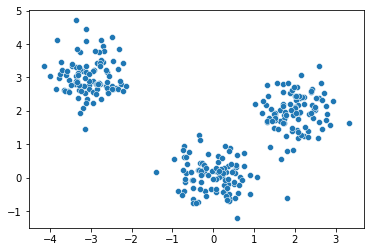

In [3]:
x = []  # data
k = 3  # hyper paramters
np.random.seed(2021)
x.extend(np.random.normal(loc=[0,0], scale=0.5, size=(100, 2)).tolist())
x.extend(np.random.normal(loc=[2,2], scale=0.5, size=(100, 2)).tolist())
x.extend(np.random.normal(loc=[-3,3], scale=0.5, size=(100, 2)).tolist())
x = np.array(x)

sns.scatterplot(x=x[:,0], y=x[:,1]);

### Train model

In [4]:
def distance(a, b):
    return sum((a - b) ** 2)/len(a)

In [5]:
def group_center(g):
    g = np.array(g)
    return g.mean(axis=0)

In [22]:
def cluster(x, k, seed=2022, iter_num=25):
    logs = []
    np.random.seed(seed)
    centers = x[np.random.choice(len(x), size=k, replace=False)]
    for it in range(iter_num):
        group = {}
        for i in range(k):
            group[i] = []
        # find nearest center
        for row in x:
            temp = []
            for i in range(k):
                temp.append(distance(centers[i], row))
            group[np.argmin(temp)].append(row.tolist())

        # plot data store
        for i in range(k):
            group_temp = np.array(group[i])
            group_temp = np.c_[group_temp, np.full(len(group_temp), i)]
            if i == 0:
                grouped = group_temp
            else:
                grouped = np.append(grouped, group_temp, axis = 0)

        # update center
        centers_new = []
        for i in range(k):
            centers_new.append(group_center(group[i]).tolist())
        centers_new = np.array(centers_new)
        # if updated center == center, break

        if np.sum(centers - centers_new) == 0:
            break
        else:
            centers = centers_new
            logs.append(grouped)
    return grouped, logs, it  

In [16]:
grouped, logs, it = cluster(x, 3)
print(f'iter num:{it}')

iter num:9


### plotting

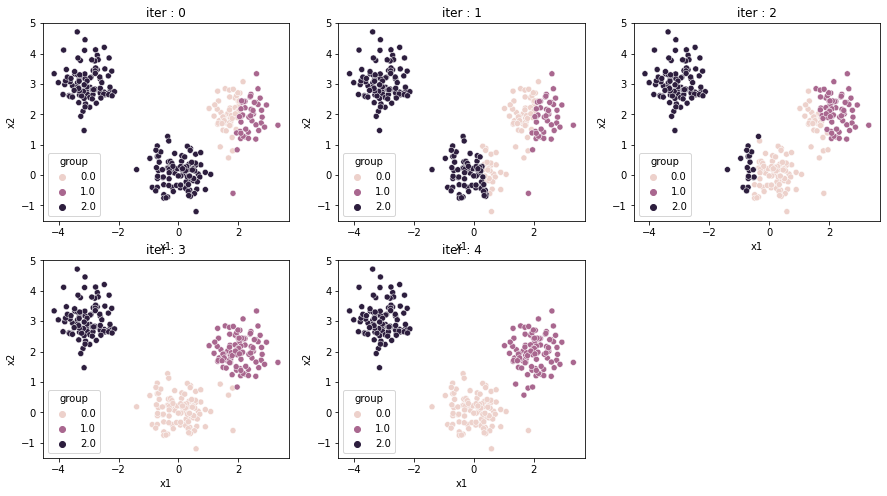

In [14]:
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')

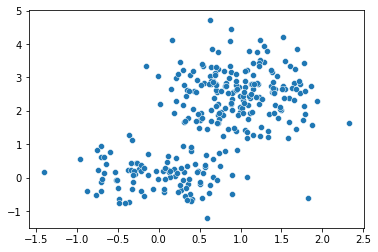

In [18]:
x = []  # data
k = 3  # hyper paramters
np.random.seed(2021)
x.extend(np.random.normal(loc=[0,0], scale=0.5, size=(100, 2)).tolist())
x.extend(np.random.normal(loc=[1,2], scale=0.5, size=(100, 2)).tolist())
x.extend(np.random.normal(loc=[1,3], scale=0.5, size=(100, 2)).tolist())
x = np.array(x)

sns.scatterplot(x=x[:,0], y=x[:,1]);

In [23]:
grouped, logs, it = cluster(x, 4)
print(f'iter num:{it}')

iter num:11


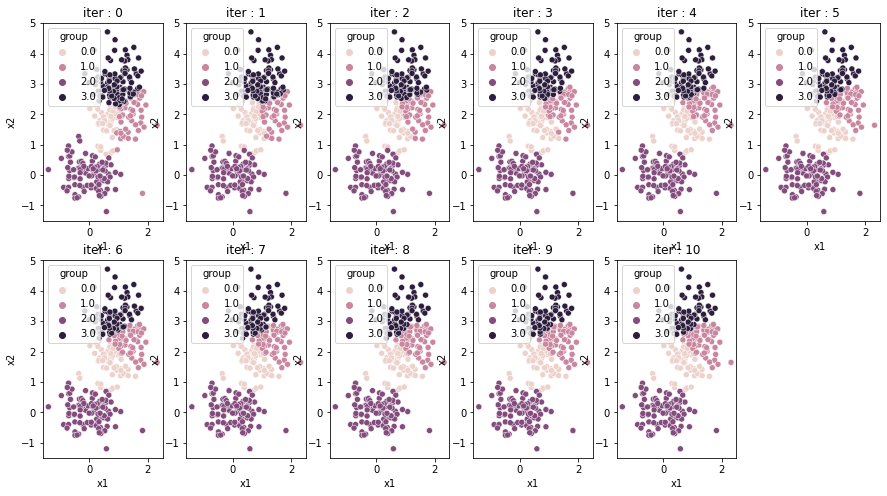

In [24]:
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')

## Result

- Time for training model takes a long time
- If selected k(hyper parameter) is not proper, the result is also bad.